# Chapter 3

This notebook contains the exercises for lecture 3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Problem 1

Let's consider our iris-dataset from the first day. Do the following:

1. Group the data based on species.
2. Calculate mean and variance for all other columns (`Sepal.Length`, `Sepal.Width`, `Petal.Lenght`, `Petal.Width`) based on this grouping.
3. Store these values into `iris_stats`-dataframe.
4. Try to get the data back into the following tidy format (`Species` (e.g. `setosa`), `Statistic` (e.g. `mean`), `Feature` (e.g. `Sepal.Length`), `Value` (e.g. value for the mean). Using [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)-function might make it easier.

|Feature|Statistic|Species|Value|
|-|-|-|-|
|0|Sepal.Length|mean|setosa|5.006000|
|1|Sepal.Length|mean|versicolor|.936000|
|2|Sepal.Length|mean|virginica|6.588000|
|3|Sepal.Length|var|setosa|0.124249|
|4|Sepal.Length|var|versicolor|0.266433|

Bonus:

- Create a function that does these operations for **all** similar datasets (all columns are used for calculations). You can try it on the `wdbc` dataset given below (group by 'Diagnosis').

Relevant API pages:

- [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [pandas.DataFrame.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
- [pandas.DataFrame.unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)
- [pandas.DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [46]:
# Define function for iris data loading
def load_iris(iris_data_file):
    iris_data = pd.read_csv(
        iris_data_file,
        names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'],
    )
    iris_data['Species'] = iris_data['Species'].map(lambda x: x.replace('Iris-','')).astype('category')
    return iris_data

iris_data = load_iris('../data/iris.data')

# Define function for wdbc data loading
def load_wdbc(wdbc_data_file):
    wdbc_data = pd.read_csv(
        wdbc_data_file,
        header=None,
        prefix='X'
    )
    #wdbc_data.drop('X0', inplace=True)
    wdbc_data['X1'] = wdbc_data['X1'].astype('category')
    wdbc_data = wdbc_data.rename(columns={'X1':'Diagnosis'})
    wdbc_data = wdbc_data.drop('X0', axis=1)
    return wdbc_data

wdbc = load_wdbc('../data/wdbc.data')

In [47]:
# Step 1
iris_grouped = iris.groupby('Species')

# Step 2 and 3
iris_stats = iris_grouped.agg([np.mean, np.var], axis=1)

# Step 4
iris_stats = iris_stats.unstack().reset_index().rename(columns={'level_0':'Feature', 'level_1': 'Statistic', 0:'Value'})

iris_stats.head()

,Feature,Statistic,Species,Value
0,Sepal.Length,mean,setosa,5.006000
1,Sepal.Length,mean,versicolor,5.936000
2,Sepal.Length,mean,virginica,6.588000
3,Sepal.Length,var,setosa,0.124249
4,Sepal.Length,var,versicolor,0.266433


Bonus:

In [42]:
def get_statistics(dataset, group_variable):
    dataset_grouped = dataset.groupby(group_variable)
    dataset_stats = dataset_grouped.agg([np.mean, np.var], axis=1)
    dataset_stats = dataset_stats.unstack().reset_index().rename(columns={'level_0':'Feature', 'level_1': 'Statistic', 0:'Value'})
    return dataset_stats

get_statistics(wdbc, 'Diagnosis').head()

,Feature,Statistic,Diagnosis,Value
0,X2,mean,B,12.146524
1,X2,mean,M,17.462830
2,X2,var,B,3.170222
3,X2,var,M,10.265431
4,X3,mean,B,17.914762


## Problem 2

Use [numpy.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) with the bins given below 

In [239]:
bins=np.linspace(0.0,10.0,21)
plotbins = pd.Series(bins[:-1]).astype(float).astype('category')

Species
setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

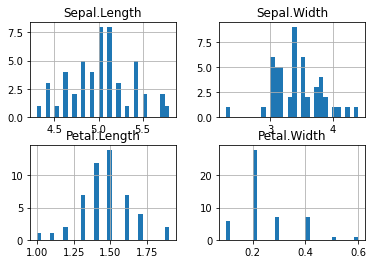

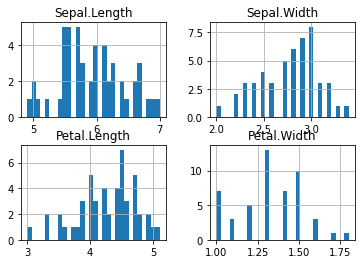

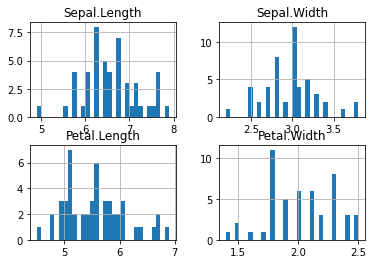

In [253]:
iris.groupby('Species').hist(bins=30)

In [240]:
def get_histogram(dataframe):
    return dataframe.apply(lambda x: np.histogram(x, bins=bins)[0], axis=0)

def get_histograms(dataset, grouping_variable):
    
    dataset_grouped = dataset.groupby(grouping_variable)
    histograms = dataset_grouped.apply(get_histogram)
    histograms = histograms.reset_index().rename('', axis=1)
    
    return histograms

histograms = get_histograms(iris, 'Species')

histograms.head()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,0,0,48
1,setosa,0,0,0,2
2,setosa,0,0,23,0
3,setosa,0,0,27,0
4,setosa,0,1,0,0


In [251]:
sb.barplot(x=plotbins, y='Sepal.Width', data=histograms, hue='Species')

ValueError: Length of grouper (20) and axis (60) must be same length

  Species  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  setosa             0            0             0           48
1  setosa             0            0             0            2
2  setosa             0            0            23            0
3  setosa             0            0            27            0
4  setosa             0            1             0            0
setosa    Species  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0   setosa             0            0             0           48
1   setosa             0            0             0            2
2   setosa             0            0            23            0
3   setosa             0            0            27            0
4   setosa             0            1             0            0
5   setosa             0            1             0            0
6   setosa             0           27             0            0
7   setosa             0           17             0            0
8   setosa             4

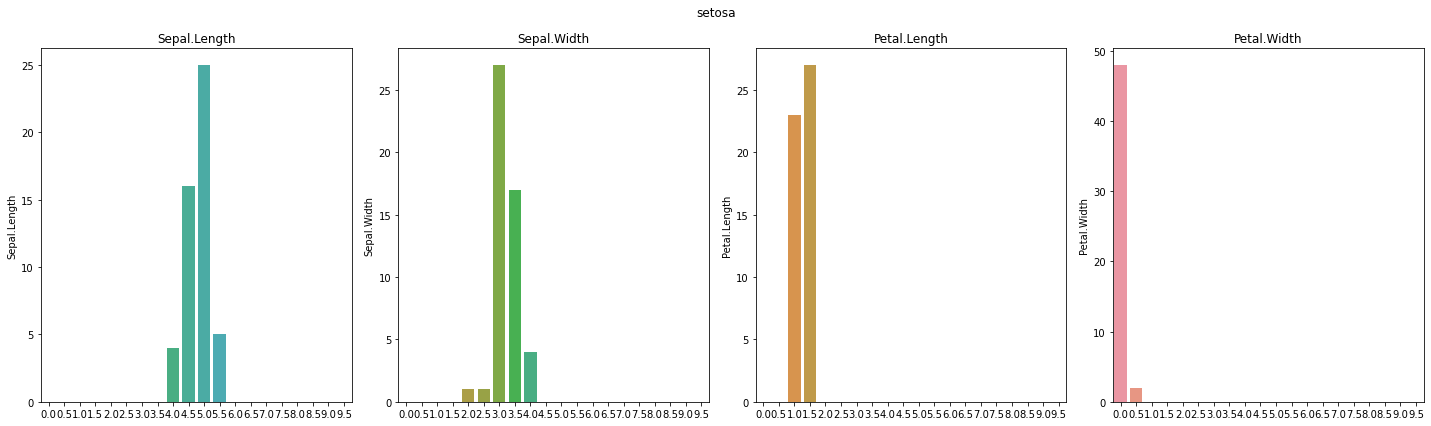

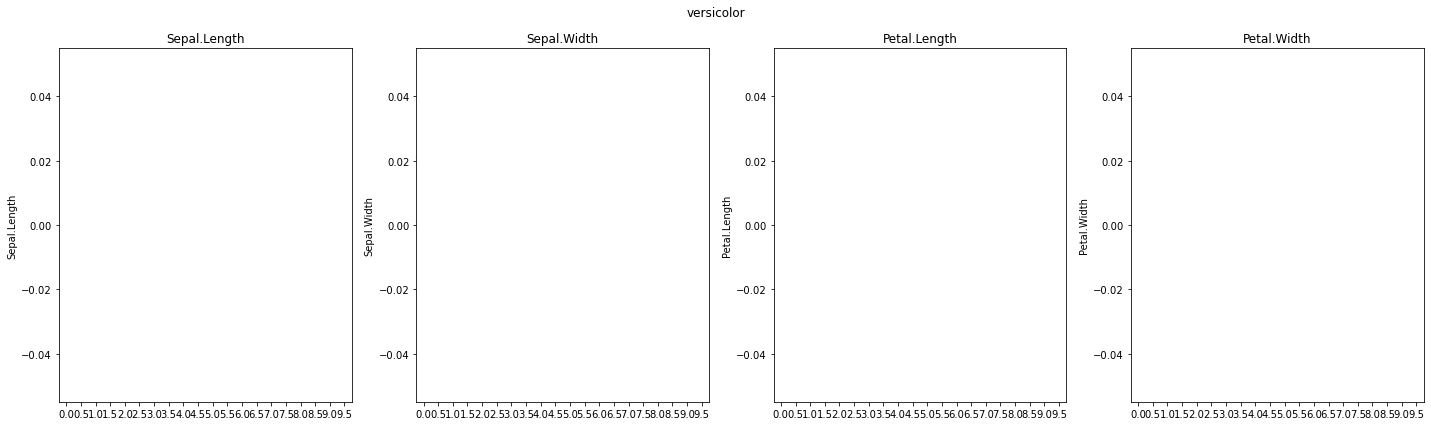

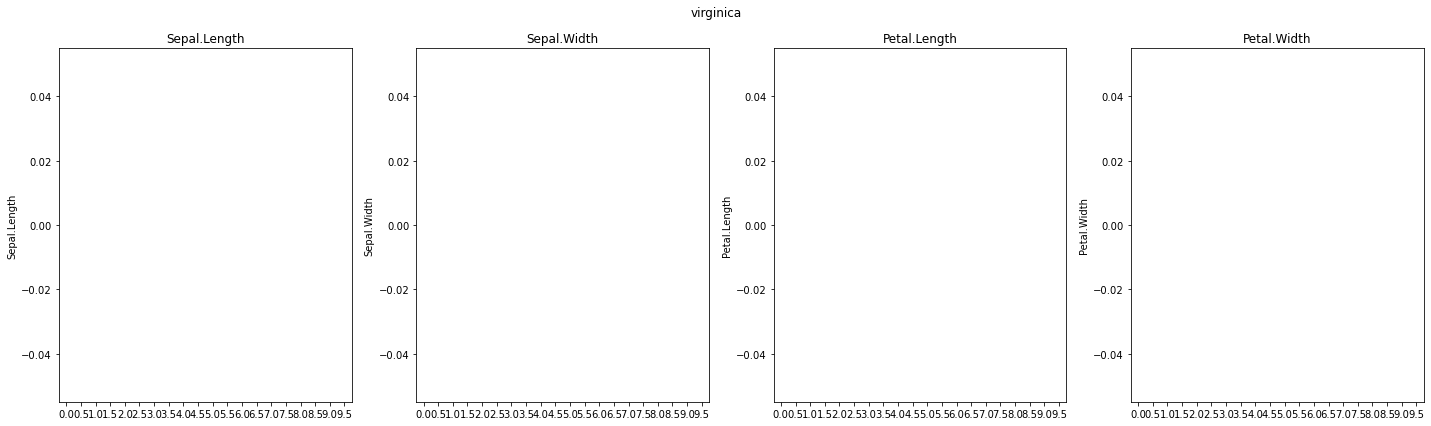

In [248]:
xticks = np.linspace(0, 10, 11).astype(float)

print(histograms.head())

for species, species_data in histograms.groupby('Species'):
    fig, axes = plt.subplots(1,4, figsize=(20,6))
    plt.setp(axes, xlim=(0, 10), xticks=xticks)
    print(species, species_data)
    for column, axis in zip(species_data.drop('Species', axis=1).columns, axes):
        sb.barplot(x=plotbins, y=column, data=species_data, ax=axis)
        #axis.bar(plotbins, species_data[column], label=species, color)
        axis.set_title(column)
    plt.suptitle(species)
    plt.tight_layout()
    #sb.barplot(x='Plotbins', y='Sepal.Width', data=species_data, hue='Species', ax=ax2)
    #sb.barplot(x='Plotbins', y='Petal.Length', data=species_data, hue='Species', ax=ax3)
    #sb.barplot(x='Plotbins', y='Petal.Width', data=species_data, hue='Species', ax=ax4)